In [79]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
 


In [80]:
df=pd.read_csv('./merged_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [82]:
df[df.isna().any(axis=1)] 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df=df.dropna(axis=0)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# altering columns

### extracting month

In [84]:
def getMonth(date:str)->str:
    return int(date.split('/')[0])-1 #get zero based 

def isDate(date:str)->bool:
    try:
        getMonth(date)
        return True
    except ValueError:
        return False

### removing invalid dates

In [85]:
df=df[df['Order Date'].apply(lambda x: isDate(x))]

In [86]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [87]:
df['month']=df['Order Date'].apply(lambda x: getMonth(x))

C:\Users\user\AppData\Local\Temp/ipykernel_14844/3503636692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['Order Date'].apply(lambda x: getMonth(x))


In [88]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",3
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",3
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",3
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",3


<AxesSubplot:>

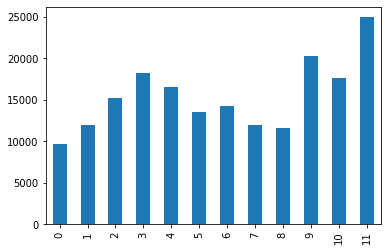

In [89]:
df['month'].value_counts().sort_index().plot(kind="bar")

# fixing data types

In [90]:
df['Price Each']= df['Price Each'].astype('float64')

C:\Users\user\AppData\Local\Temp/ipykernel_14844/4087364604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each']= df['Price Each'].astype('float64')


In [91]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')

C:\Users\user\AppData\Local\Temp/ipykernel_14844/2000144462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   month             185950 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


### finding relations between month and product sales

Text(0.5, 1.0, 'february')

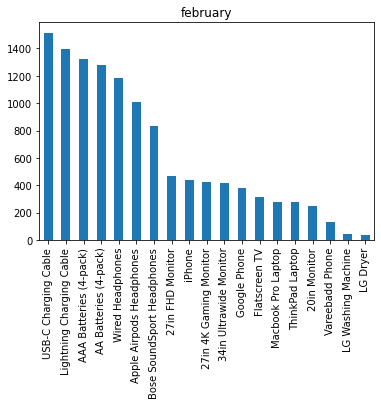

In [93]:
df[df['month']==1]['Product'].value_counts().plot(kind='bar')
plt.title('february')

Text(0.5, 1.0, 'january')

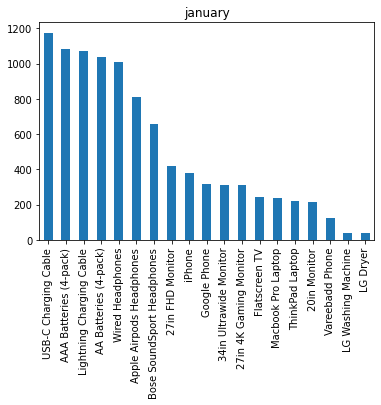

In [94]:
df[df['month']==0]['Product'].value_counts().plot(kind='bar')
plt.title('january')

Text(0.5, 1.0, 'march')

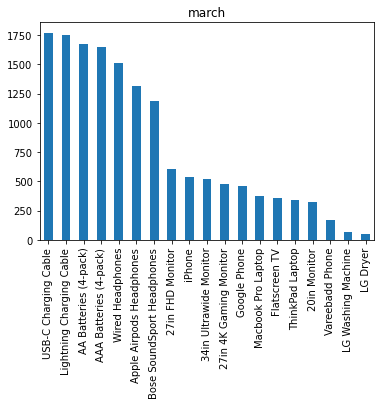

In [95]:
df[df['month']==2]['Product'].value_counts().plot(kind='bar')
plt.title('march')

Text(0.5, 1.0, 'april')

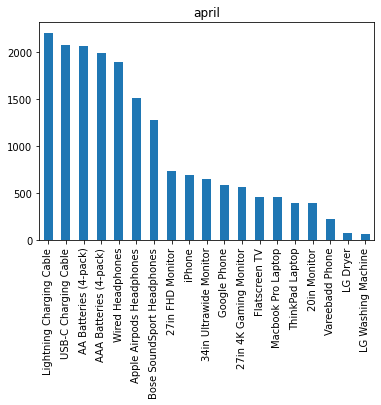

In [96]:
df[df['month']==3]['Product'].value_counts().plot(kind='bar')
plt.title('april')

In [97]:

itemIndex=0
itemDict={}
for n in df['Product'].unique():
    itemDict[n]=itemIndex
    itemIndex+=1

itemDict

{'USB-C Charging Cable': 0,
 'Bose SoundSport Headphones': 1,
 'Google Phone': 2,
 'Wired Headphones': 3,
 'Macbook Pro Laptop': 4,
 'Lightning Charging Cable': 5,
 '27in 4K Gaming Monitor': 6,
 'AA Batteries (4-pack)': 7,
 'Apple Airpods Headphones': 8,
 'AAA Batteries (4-pack)': 9,
 'iPhone': 10,
 'Flatscreen TV': 11,
 '27in FHD Monitor': 12,
 '20in Monitor': 13,
 'LG Dryer': 14,
 'ThinkPad Laptop': 15,
 'Vareebadd Phone': 16,
 'LG Washing Machine': 17,
 '34in Ultrawide Monitor': 18}

## labeling products as numbers

In [98]:
df['productID']=df['Product'].apply(lambda x: itemDict[x])

C:\Users\user\AppData\Local\Temp/ipykernel_14844/1229344904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['productID']=df['Product'].apply(lambda x: itemDict[x])


In [99]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,productID
114873,171186,ThinkPad Laptop,1,999.99,03/01/19 10:25,"736 North St, Dallas, TX 75001",2,15
40567,305366,AA Batteries (4-pack),1,3.84,12/20/19 16:19,"634 Lincoln St, Boston, MA 02215",11,7
96921,214930,AAA Batteries (4-pack),1,2.99,06/25/19 16:47,"39 Forest St, San Francisco, CA 94016",5,9
34000,299101,Lightning Charging Cable,1,14.95,12/28/19 22:37,"76 Pine St, Dallas, TX 75001",11,5
10760,186830,AA Batteries (4-pack),2,3.84,04/13/19 21:34,"997 10th St, San Francisco, CA 94016",3,7
153789,294716,Bose SoundSport Headphones,1,99.99,11/19/19 19:09,"721 Jefferson St, Seattle, WA 98101",10,1
67172,161648,AA Batteries (4-pack),2,3.84,02/17/19 08:36,"792 Lakeview St, Dallas, TX 75001",1,7
102413,220196,Wired Headphones,1,11.99,06/07/19 19:35,"927 Forest St, Los Angeles, CA 90001",5,3
39173,304036,AAA Batteries (4-pack),1,2.99,12/03/19 14:22,"707 8th St, San Francisco, CA 94016",11,9
94861,212979,Flatscreen TV,1,300.00,06/01/19 12:05,"35 Cherry St, San Francisco, CA 94016",5,11


## product to month relation

In [100]:
df[df['productID']==0]['month'].value_counts().sort_values()

0     1174
7     1344
8     1454
1     1514
5     1534
6     1668
2     1770
4     1883
10    2062
3     2078
9     2442
11    2980
Name: month, dtype: int64

Text(0.5, 1.0, 'USB-C Charging Cable sales in january')

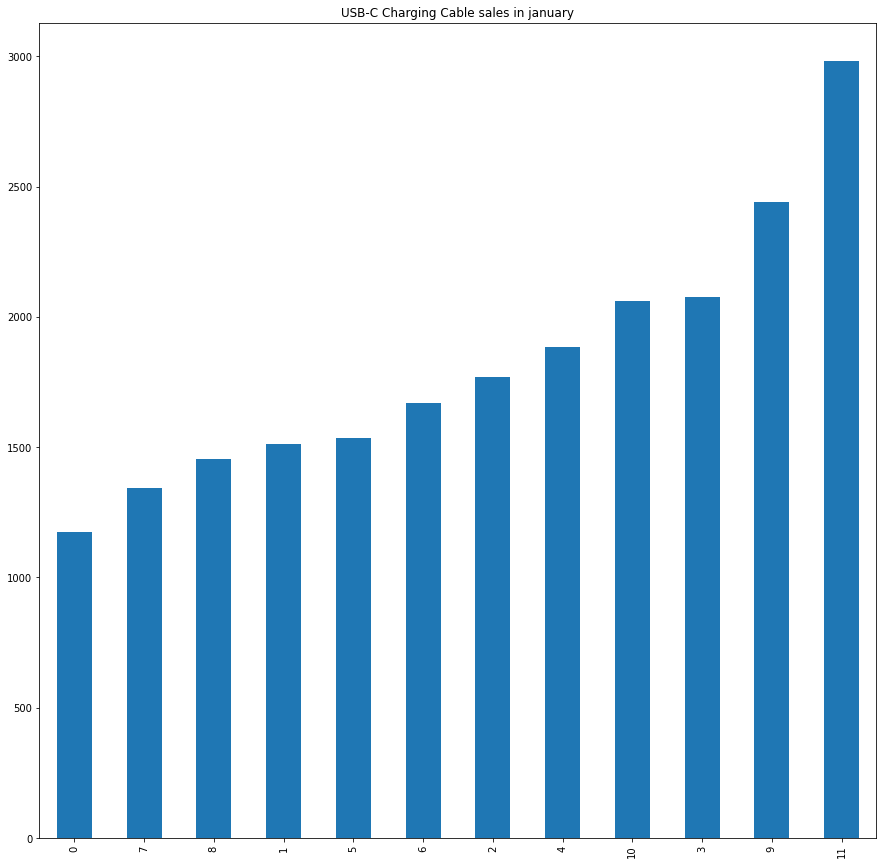

In [101]:
df[df['productID']==0]['month'].value_counts().sort_values().plot(kind='bar',figsize=(15,15))
plt.title('USB-C Charging Cable sales in january')

Text(0.5, 1.0, '27in FHD Monitor\t')

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


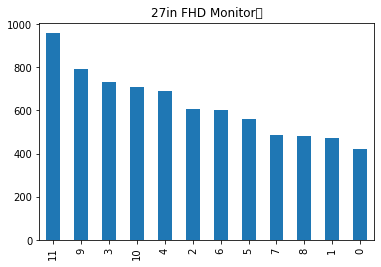

In [102]:
df[df['productID']==12]['month'].value_counts().plot(kind='bar')
plt.title('27in FHD Monitor	')

## calculate total income from each product in each month

In [103]:
income_of_each_product_in_each_month={}
total_income_in_each_month ={}

def calculateRevenue(row):
    
    try:
        productId=row['productID']
        month=row['month']
        income=row['Price Each']*row['Quantity Ordered']
        if productId not in income_of_each_product_in_each_month:
            income_of_each_product_in_each_month[productId]=[0 for n in range(12)]
        income_of_each_product_in_each_month[productId][month]+=income
        if month not in total_income_in_each_month:
            total_income_in_each_month[month]=[0 for n in range(19)]
        
        total_income_in_each_month[month][productId]+=income
    except KeyError:
        print(row)
         

In [104]:
list(df.columns)

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address',
 'month',
 'productID']

In [105]:
for row in df.iloc:
    calculateRevenue(row)

In [106]:
income_of_each_product_in_each_month

{0: [15379.65000000027,
  19765.300000000512,
  23230.80000000072,
  27114.550000000974,
  24712.6000000008,
  20016.250000000546,
  22095.55000000066,
  17470.900000000387,
  19048.300000000454,
  31870.650000001235,
  26959.200000000947,
  38837.500000000065],
 1: [66193.3799999996,
  84091.5900000005,
  119788.02000000235,
  128687.13000000281,
  117588.24000000222,
  98290.17000000126,
  105989.40000000167,
  88091.1900000007,
  82791.72000000048,
  146485.35000000152,
  125187.48000000263,
  182381.75999999826],
 2: [191400.0,
  228600.0,
  277800.0,
  348000.0,
  288000.0,
  234600.0,
  246600.0,
  216600.0,
  204600.0,
  358200.0,
  295800.0,
  429000.0],
 3: [13009.14999999981,
  15335.209999999766,
  19951.360000000164,
  24759.350000000664,
  22493.240000000427,
  17673.25999999988,
  18764.350000000002,
  15479.08999999977,
  15598.989999999767,
  27265.260000000962,
  23188.660000000516,
  32960.51000000157],
 4: [399500.0,
  469200.0,
  644300.0,
  771800.0,
  790500.0,
  

### income in january

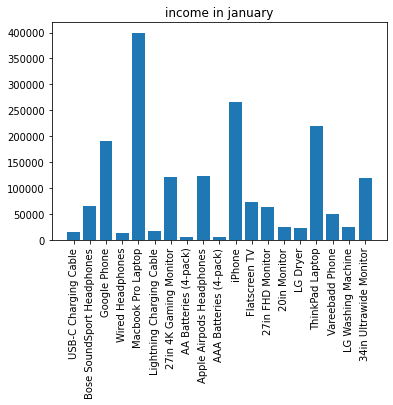

In [107]:
productNames=list(df['Product'].unique())
plt.bar(range(len(productNames)),total_income_in_each_month[0],tick_label=productNames )
plt.title('income in january')
plt.xticks(rotation=90)
plt.show()

### income from USB-C Charging Cable in each month

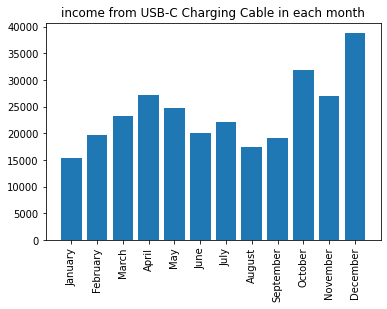

In [108]:
monthNames=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.bar(range(len(monthNames)),income_of_each_product_in_each_month[0],tick_label=monthNames )
plt.title("income from USB-C Charging Cable in each month")
plt.xticks(rotation=90)
plt.show()

# get city name

In [109]:
def getCity(place: str)->str:
    return place.split(',')[1]

df['city']=df['Purchase Address'].apply(getCity)

C:\Users\user\AppData\Local\Temp/ipykernel_14844/2878853266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city']=df['Purchase Address'].apply(getCity)


In [110]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,productID,city
39183,304046,Macbook Pro Laptop,1,1700.00,12/15/19 17:31,"709 Elm St, Los Angeles, CA 90001",11,4,Los Angeles
17287,193058,Wired Headphones,1,11.99,04/18/19 23:05,"573 Chestnut St, San Francisco, CA 94016",3,3,San Francisco
36632,301612,AAA Batteries (4-pack),1,2.99,12/27/19 12:15,"892 Maple St, San Francisco, CA 94016",11,9,San Francisco
81953,227394,Wired Headphones,1,11.99,07/30/19 10:26,"590 12th St, San Francisco, CA 94016",6,3,San Francisco
182894,255558,USB-C Charging Cable,1,11.95,09/11/19 18:47,"866 Pine St, Los Angeles, CA 90001",8,0,Los Angeles
3577,179987,AA Batteries (4-pack),2,3.84,04/30/19 17:19,"261 Lakeview St, Atlanta, GA 30301",3,7,Atlanta
95161,213265,AAA Batteries (4-pack),2,2.99,06/20/19 21:10,"795 1st St, San Francisco, CA 94016",5,9,San Francisco
898,177413,Wired Headphones,1,11.99,04/07/19 21:34,"892 12th St, Seattle, WA 98101",3,3,Seattle
42227,306947,USB-C Charging Cable,1,11.95,12/21/19 12:48,"755 Maple St, New York City, NY 10001",11,0,New York City
169444,273356,AA Batteries (4-pack),1,3.84,10/07/19 21:20,"660 Highland St, San Francisco, CA 94016",9,7,San Francisco


In [111]:
cityNames=list(df['city'].unique())
cityNames
cityIndexMap={}
cityIndex=0
for city in cityNames:
    cityIndexMap[city]=cityIndex
    cityIndex+=1


In [112]:
df['cityID']=df['city'].apply(lambda city: cityIndexMap[city])

C:\Users\user\AppData\Local\Temp/ipykernel_14844/3428157813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cityID']=df['city'].apply(lambda city: cityIndexMap[city])


In [113]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,productID,city,cityID
180201,252983,Vareebadd Phone,1,400.00,09/17/19 13:18,"734 2nd St, Seattle, WA 98101",8,16,Seattle,4
138245,279866,Lightning Charging Cable,1,14.95,11/12/19 11:55,"673 North St, San Francisco, CA 94016",10,5,San Francisco,3
125979,199314,iPhone,1,700.00,05/17/19 00:09,"773 8th St, New York City, NY 10001",4,10,New York City,6
82103,227536,AA Batteries (4-pack),2,3.84,07/11/19 13:24,"141 Highland St, Los Angeles, CA 90001",6,7,Los Angeles,2
116981,173198,Wired Headphones,1,11.99,03/10/19 14:01,"66 Washington St, Seattle, WA 98101",2,3,Seattle,4


## city to product relation

In [114]:
income_in_each_city={}
income_from_each_product={}

def getCityToProductRevenue(row):
    try:
        productId=row['productID']
        city=row['cityID']
        income=row['Price Each']*row['Quantity Ordered']
        if productId not in income_from_each_product:
            income_from_each_product[productId]=[0 for n in range(len(cityNames))]
        income_from_each_product[productId][city]+=income
        if city not in income_in_each_city:
            income_in_each_city[city]=[0 for n in range(len(productNames))]
        
        income_in_each_city[city][productId]+=income
    except KeyError:
        print(row)

In [115]:
for row in df.iloc:
    getCityToProductRevenue(row)

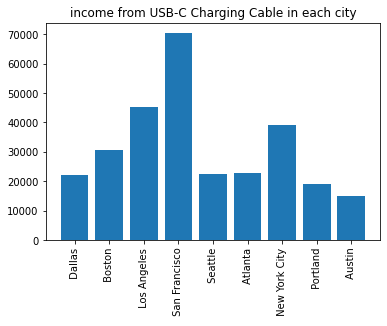

In [116]:

plt.bar(range(len(cityNames)),income_from_each_product[0],tick_label=cityNames )
plt.title("income from USB-C Charging Cable in each city")
plt.xticks(rotation=90)
plt.show()

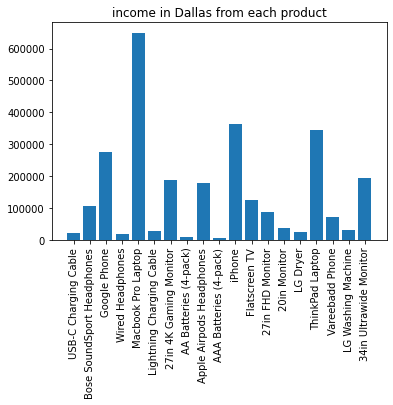

In [117]:
plt.bar(range(len(productNames)),income_in_each_city[0],tick_label=productNames )
plt.title("income in Dallas from each product")
plt.xticks(rotation=90)
plt.show()